In [54]:
import pandas as pd
import numpy as np 
import configUtils
import config
from matplotlib import pyplot as plt 

arguments = {}
arguments["donorFile"] = config.filePaths.get("donorFile")
arguments["recipientFile"] = config.filePaths.get("recipientFile")

In [63]:
columnNames  = ["#chrom", "start", "end", "read_id", "mapq", "cigar1", "cigar2"]
fullDonorNumpy = pd.read_csv(arguments["donorFile"],
            sep = "\t", names = columnNames, skiprows=11).to_numpy()
fullRecipientNumpy = pd.read_csv(arguments["recipientFile"],
            sep = "\t", names = columnNames, skiprows=11).to_numpy()

print("Done reading bed files")

#TODO remove once testing is done
# fullDonorNumpy = fullDonorNumpy[0:15]
# fullRecipientNumpy = fullRecipientNumpy[0:15]
print(fullDonorNumpy)

donorRows, donorCols = fullDonorNumpy.shape
recipRows, recipCols = fullRecipientNumpy.shape

donorLabelsArray = np.zeros((donorRows, 1))
recipLabelsArray = np.ones((recipRows, 1))

lengthNumpyDonor = fullDonorNumpy[:,2].astype(int) - fullDonorNumpy[:,1].astype(int)
lengthNumpyDonor = lengthNumpyDonor.reshape((donorRows, 1))
lengthNumpyDonor = np.append(lengthNumpyDonor, donorLabelsArray, axis=1)

lengthNumpyRecip = fullRecipientNumpy[:,2].astype(int) - fullRecipientNumpy[:,1].astype(int)
lengthNumpyRecip = lengthNumpyRecip.reshape((recipRows, 1))
lengthNumpyRecip = np.append(lengthNumpyRecip, recipLabelsArray, axis=1)

lengthArrayToPlot = np.append(lengthNumpyDonor,lengthNumpyRecip,axis=0)
print(lengthArrayToPlot)

Done reading bed files
[[1 814136 814348 ... 47 '101M' '101M']
 [1 965601 965757 ... 40 '90M' '101M']
 [1 1127679 1127877 ... 60 '101M' '101M']
 ...
 [22 50925851 50926025 ... 60 '101M' '101M']
 [22 51082508 51082676 ... 4 '101M' '101M']
 [22 51082604 51082768 ... 60 '101M' '101M']]
[[212.   0.]
 [156.   0.]
 [198.   0.]
 ...
 [179.   1.]
 [168.   1.]
 [195.   1.]]


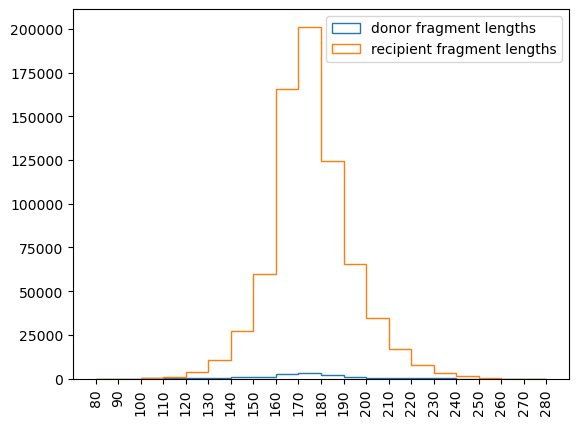

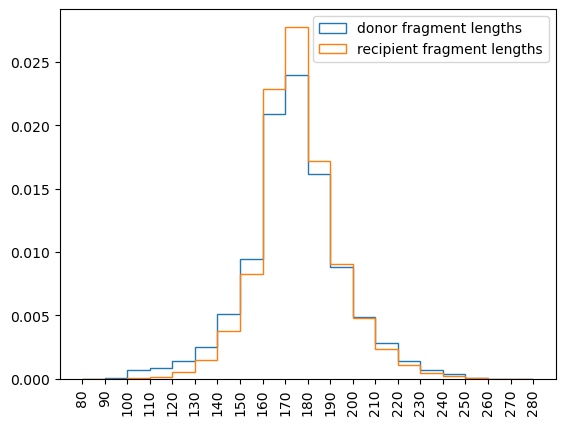

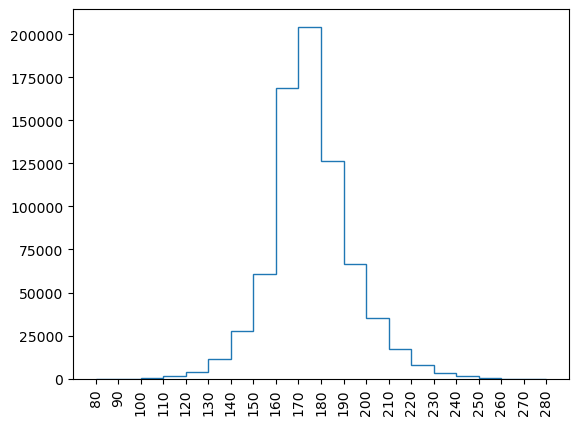

In [83]:
bins = bins=np.linspace(80, 280, 21)

#The number of donor fragments is much lower than the number of recipient fragments. So if we plot just the numbers 
#there is an imbalance. Keeping this plot in, just to show that donor data is much less compared to recipient data
n, donorHist, _ = plt.hist(lengthNumpyDonor[:,0],bins = bins, histtype=u'step', label = "donor fragment lengths")
plt.xticks(bins)
plt.xticks(rotation=90)

n, recipHist, _ = plt.hist(lengthNumpyRecip[:,0],bins = bins, histtype=u'step', label = "recipient fragment lengths")
plt.xticks(bins)
plt.xticks(rotation=90)

plt.legend(loc='upper right')
plt.show()

#Plot the densities to fix the imbalance
n, donorHist, _ = plt.hist(lengthNumpyDonor[:,0],bins = bins, histtype=u'step', label = "donor fragment lengths", density = True)
plt.xticks(bins)
plt.xticks(rotation=90)

n, recipHist, _ = plt.hist(lengthNumpyRecip[:,0],bins = bins, histtype=u'step', label = "recipient fragment lengths", density = True)
plt.xticks(bins)
plt.xticks(rotation=90)

plt.legend(loc='upper right')
plt.show()

plt.hist(lengthArrayToPlot[:,0],bins = bins, histtype = u'step')
plt.xticks(bins)
plt.xticks(rotation=90)
plt.show()